# Assuntos abordados pelos blogueiros

-Descobrindo os assuntos mais abordados pelos blogueiros.

-Exibindo resultado em uma núvem de palavras.

-Os assuntos mais abordados serão exibidos em tamanho de fonte maior.

-Os abordados com menor frequência em tamanho de fonte menos.

In [29]:
#importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
#incerindo o banco de dados
df = pd.read_csv("C:/Users/mateus/Desktop/ArquivosCSV/blog/4300Answers.csv", encoding="UTF-8", sep=",")

In [31]:
df

,Timestamp,AuthorID,Sobre qual(is) tópico(s) você mais escreve?,Utiliza outra rede social?,Qual sua idade?,Qual seu sexo?,Qual sua atividade profissional?,Qual o endereço do seu blogspot?,Onde você mora?,Código Único,Há quanto tempo você mantém esse blog?,Qual o período de atualização do blog?,Costuma deixar comentários nos blogs que segue?,Com relação a autoria do conteúdo de seu blog:,Quantidade média de acessos do seu blog por mês?,Nivel de Escolaridade,Gostaria que seu blog fosse publicado na lista deste estudo?
0,28-Mar-2012,08741884562446510660,"Tecnologia, Viagens","Twitter, Facebook, Orkut, Flickr, Linkedin",30 à 40 anos,Masculino,Professor,http://lkwives.blogspot.com.br/,Porto Alegre,08741884562446510660,entre 3 e 4 anos,mensalmente,"Sim, raramente",NaN,NaN,NaN,NaN
1,29-Mar-2012,07057956474529920239,"Artes, Filosofia, Literatura / Livros, Polític...",NaN,40 à 60 anos,Masculino,Jornalista e sociólogo (agora também formado e...,www.juliprates.blogspot.com,SANTIAGO/RS/BRASIL,07057956474529920239,mais de 4 anos,diariamente,Não costumo deixar comentários,NaN,NaN,NaN,NaN
2,29-Mar-2012,11807897332463595720,"Filosofia, Tecnologia","Facebook, Linkedin",19 à 25 anos,Masculino,Consultor de Software,http://configuracaominima.blogspot.com,"Porto Alegre, RS, Brasil",11807897332463595720,mais de 4 anos,raramente,Não costumo deixar comentários,NaN,NaN,NaN,NaN
3,29-Mar-2012,05737856882009129069,"Política, Saúde, Tecnologia, VÍDEOS. JÁ PUBLIC...",Facebook,mais de 60 anos,Masculino,MÉDICO,www.sdcidad.blogspot.com,"FEIRA DE SANTANA,BAHIA,BRASIL",05737856882009129069,entre 1 e 2 anos,diariamente,"Sim, raramente",NaN,NaN,NaN,NaN
4,30-Mar-2012,04650502123448146932,"Futebol, Política","Twitter, Facebook, Orkut, Linkedin",40 à 60 anos,Masculino,jornalista,http://blogentrelinhas.blogspot.com.br/,"são paulo, SP, Brasil",04650502123448146932,mais de 4 anos,raramente,"Sim, raramente",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4326,19-Jun-2012,04978720838903904441,"Educação, Viagens, Marketing Digital","Twitter, Wordpress, Facebook, Orkut, Tumblr, F...",26 à 30 anos,Masculino,Analista de Sistemas,http://intercambiobr.blogspot.com,"Diadema, São Paulo, Brasil",04978720838903904441,entre 1 e 2 anos,diariamente,"Sim, frequentemente","Crio meu próprio conteúdo, Re-publico conteúdo...",até 5.000 (cinco mil) acessos por mês,Superior Completo,NaN
4327,19-Jun-2012,16968395029423562069,Literatura / Livros,"Twitter, Facebook, Tumblr",19 à 25 anos,Masculino,Professor,opehu.blogspot.com.br,"Indaiatuba, São Paulo, Brasil",16968395029423562069,entre 3 e 4 anos,2 vezes por semana,"Sim, raramente",Crio meu próprio conteúdo,100 (cem) acessos por mês,Superior Completo,NaN
4328,20-Jun-2012,10142366745621401477,"Política, segurança pública","Twitter, Facebook, Flickr",30 à 40 anos,Masculino,Jornalista,tupanfloripa.blogspot,Florianópolis,10142366745621401477,entre 3 e 4 anos,2 vezes por semana,"Sim, raramente",Crio meu próprio conteúdo,até 5.000 (cinco mil) acessos por mês,Superior Completo,NaN
4329,20-Jun-2012,15896847799633812396,"Cinema, Educação, Fotografia, Futebol, Literat...",NaN,30 à 40 anos,Masculino,Proprietário de jornal impresso e consultor em...,magnosiqueira.blogspot.com,Imperatriz-MA,15896847799633812396,entre 1 e 2 anos,diariamente,"Sim, raramente","Crio meu próprio conteúdo, Re-publico conteúdo...",1.000 (mil) acessos por mês,Superior Incompleto,NaN


In [32]:
#criando um dataframe com a coluna a ser analisada
Sobre_qual_tópico_você_mais_escreve = df['Sobre qual(is) tópico(s) você mais escreve?']

In [33]:
Sobre_qual_tópico_você_mais_escreve

0                                     Tecnologia, Viagens
1       Artes, Filosofia, Literatura / Livros, Polític...
2                                   Filosofia, Tecnologia
3       Política, Saúde, Tecnologia, VÍDEOS. JÁ PUBLIC...
4                                       Futebol, Política
                              ...                        
4326                 Educação, Viagens, Marketing Digital
4327                                  Literatura / Livros
4328                          Política, segurança pública
4329    Cinema, Educação, Fotografia, Futebol, Literat...
4330                                  Literatura / Livros
Name: Sobre qual(is) tópico(s) você mais escreve?, Length: 4331, dtype: object

In [34]:
#agrupando os blogs em uma string unica

string = pd.Series(Sobre_qual_tópico_você_mais_escreve.values).str.cat(sep=' ')
string

'Tecnologia, Viagens Artes, Filosofia, Literatura / Livros, Política, Tecnologia Filosofia, Tecnologia Política, Saúde, Tecnologia, VÍDEOS. JÁ PUBLICIZEI 570 VÍDEOS NO YOUTUBE Futebol, Política Educação, Filosofia, Política, historia, sociologia Amizade, Futebol, Futebol de Mesa Educação, Literatura / Livros, Política Amizade, Filosofia, Literatura / Livros, Música, coisas pessoais vividas Tecnologia, Informática, Programação, Segurança Digital Artes, Cinema, Filosofia, Música, Política decoração Artes, Cinema, Educação, Filosofia, Literatura / Livros, Música, Política, Teatro Artes, Saúde, Tecnologia Artes, Literatura / Livros, Música Literatura / Livros Artes, Educação, Moda, Música, Saúde Política, mundo gay Amizade, Minha casa, minha vida e minhas preferências Filosofia, Literatura / Livros, Política Política Cinema, Literatura / Livros Humor Fotografia, Literatura / Livros Artes, Filosofia, Literatura / Livros, Política Cinema, Educação, Fotografia, Literatura / Livros, Moda, Músi

In [35]:
#removendo caracteres especiais
caracteres = "#@"

for i in range(len(caracteres)):
    string = string.replace(caracteres[i],"")
string

'Tecnologia, Viagens Artes, Filosofia, Literatura / Livros, Política, Tecnologia Filosofia, Tecnologia Política, Saúde, Tecnologia, VÍDEOS. JÁ PUBLICIZEI 570 VÍDEOS NO YOUTUBE Futebol, Política Educação, Filosofia, Política, historia, sociologia Amizade, Futebol, Futebol de Mesa Educação, Literatura / Livros, Política Amizade, Filosofia, Literatura / Livros, Música, coisas pessoais vividas Tecnologia, Informática, Programação, Segurança Digital Artes, Cinema, Filosofia, Música, Política decoração Artes, Cinema, Educação, Filosofia, Literatura / Livros, Música, Política, Teatro Artes, Saúde, Tecnologia Artes, Literatura / Livros, Música Literatura / Livros Artes, Educação, Moda, Música, Saúde Política, mundo gay Amizade, Minha casa, minha vida e minhas preferências Filosofia, Literatura / Livros, Política Política Cinema, Literatura / Livros Humor Fotografia, Literatura / Livros Artes, Filosofia, Literatura / Livros, Política Cinema, Educação, Fotografia, Literatura / Livros, Moda, Músi

In [36]:
#retirando termos que não serão uteis

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(["de","e","com","o","a","por","dar","ser","aqui","vou","dos"])

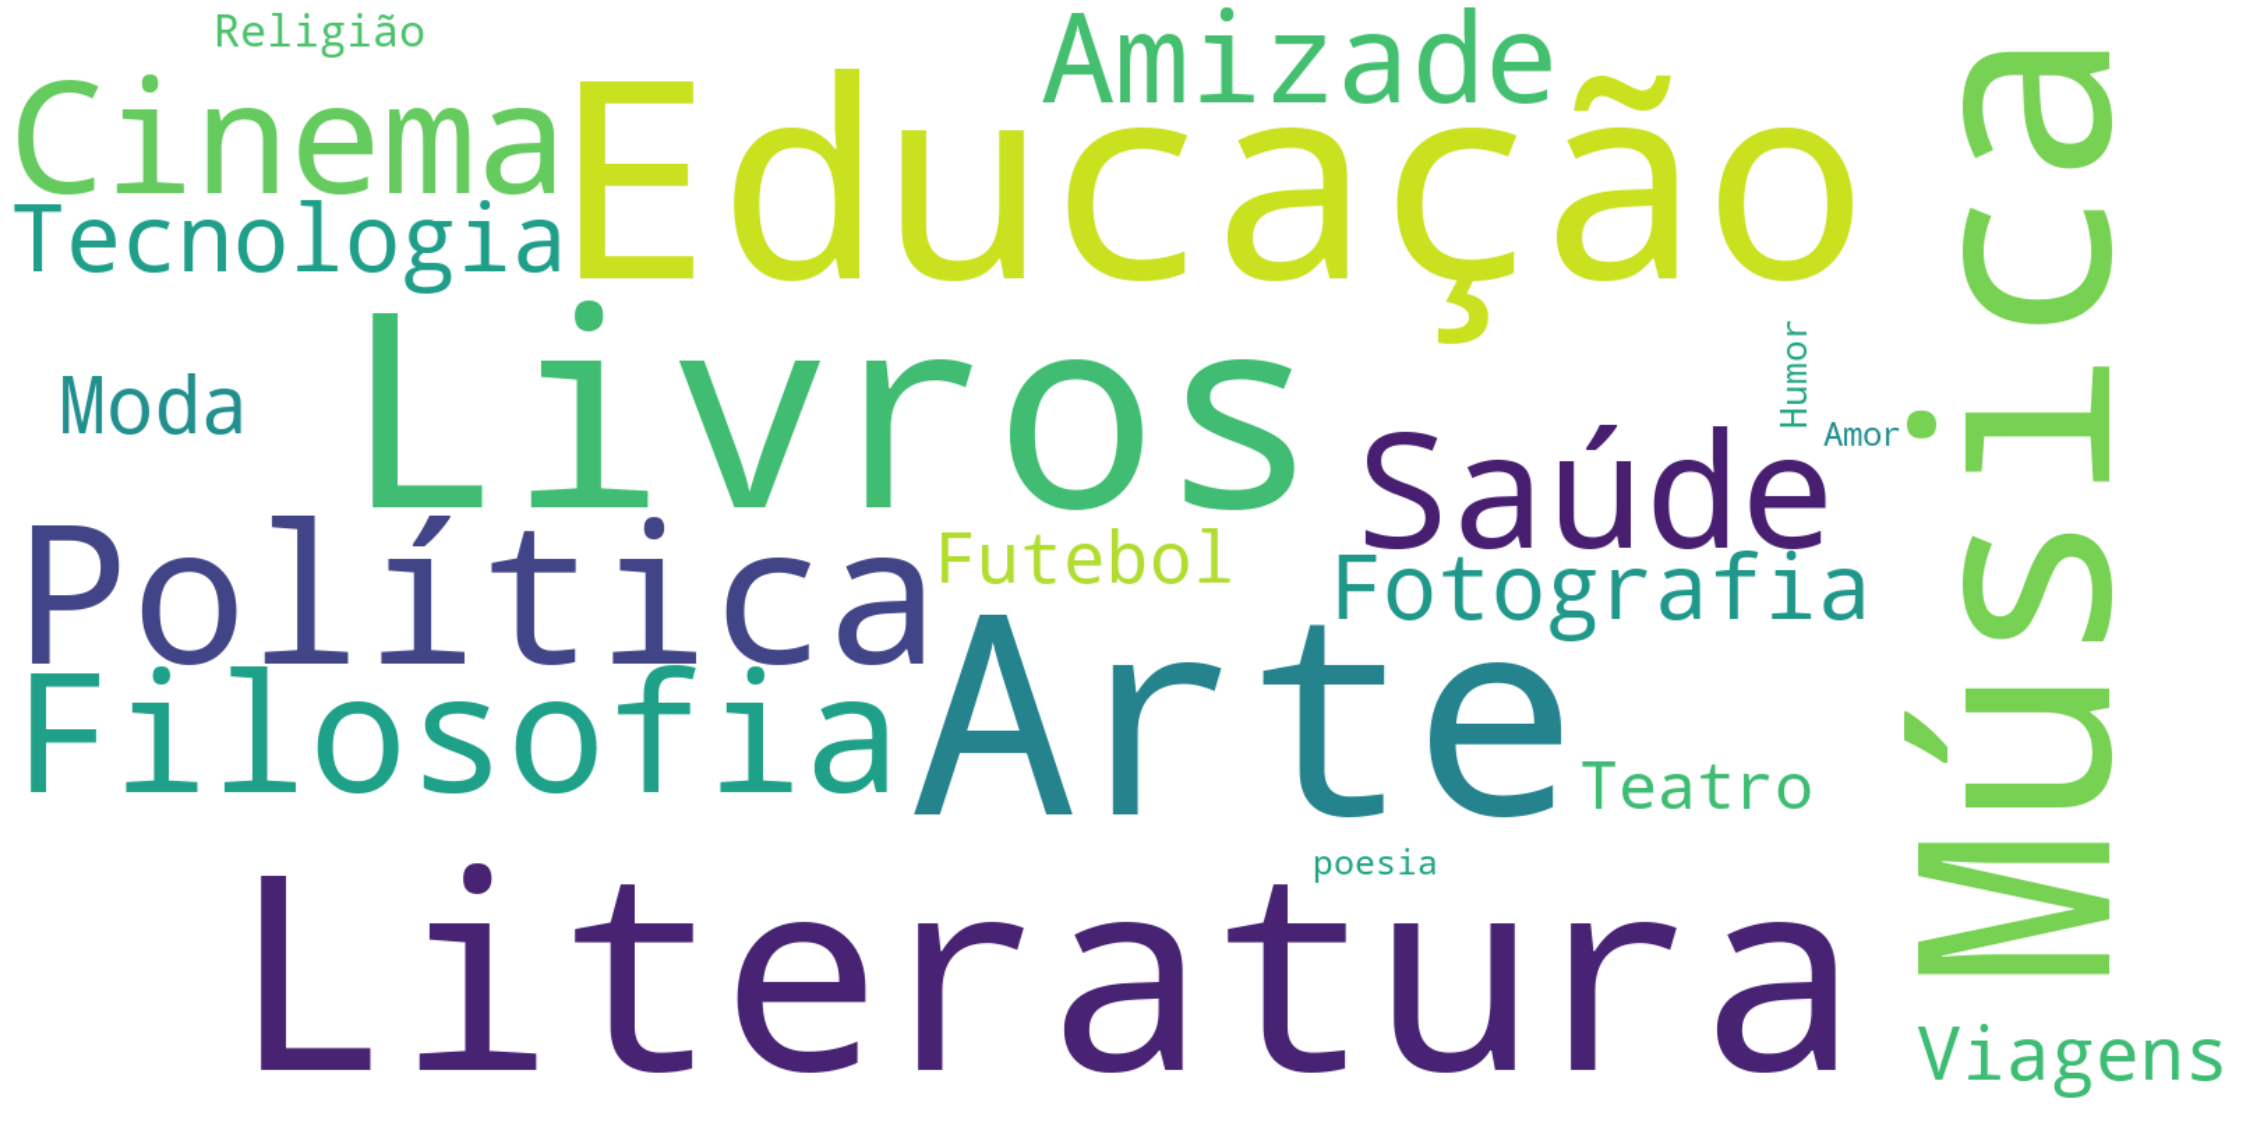

In [37]:
#criação da nuvem de palavras

wordcloud = WordCloud(width=1600, stopwords=stopwords, height=800, max_font_size=200, max_words=20, collocations=False, background_color='white').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

-Podemos observar que os assuntos mais abordados pelos blogueiros são: 

Literatura, Educação, Livros, Arte, Política e Música.